# Data Workflow Lab 1

Clean and summarize Project 3 data.

### Learning Objectives

* Practice text cleaning techniques
* Practice datatype conversion
* Practice filling in missing values with either 0 or the average in the column
* Practice categorical data techniques
* Transform data into usable quantities


In [77]:
% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import r2_score

from sklearn.cross_validation import train_test_split

In [78]:
# Load the data

df = pd.read_csv('Iowa_Liquor_Sales_reduced.csv')

print df.columns
df.head()

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


## Clean the data

Let's practice our data cleaning skills on the Project 3 dataset. If you don't remember how to do any of these tasks, look back at your work from the previous weeks or search the internet. There are many blog articles and Stack Overflow posts that cover these topics.

You'll want to complete at least the following tasks:
* Remove redundant columns
* Remove "$" prices from characters and convert values to floats.
* Convert dates to pandas datetime objects
* Convert category floats to integers
* Drop or fill in bad values

In [79]:
# Remove redundant columns

del df['Volume Sold (Gallons)']

# Remove $ from certain columns

df['State Bottle Cost'] = df['State Bottle Cost'].map(lambda x: x.strip().replace('$', ''))
df['State Bottle Retail'] = df['State Bottle Retail'].map(lambda x: x.strip().replace('$', ''))
df['Sale (Dollars)'] = df['Sale (Dollars)'].map(lambda x: x.strip().replace('$', ''))

df['State Bottle Cost'] = df['State Bottle Cost'].astype('float')
df['State Bottle Retail'] = df['State Bottle Retail'].astype('float')
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')

# Convert dates

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Drop or replace bad values
df = df.dropna()

## creating df for bottle sized under 6L 

df_ = df[df['Bottle Volume (ml)'] <= 6000]

## Filter the Data

Some stores may have opened or closed in 2015. These data points will heavily skew our models, so we need to filter them out or find a way to deal with them.

You'll need to provide a summary in your project report about these data points. You may also consider using the monthly sales in your model and including other information (number of months or days each store is open) in your data to handle these unusual cases.

Let's record the first and last sales dates for each store. We'll save this information for later when we fit our models.

In [39]:
# Determine which stores were open all of 2015
# Find the first and last sales date.



# Filter out stores that opened or closed throughout the year
# You may want to save this step until you start modelling


## Compute New Columns and Tables

Since we're trying to predict sales and/or profits, we'll want to compute some intermediate data. There are a lot of ways to do thisand good use of pandas is crucial. For example, for each transaction we may want to know:
* margin, retail cost minus bottle cost
* price per bottle
* price per liter

We'll need to make a new dataframe that indexes quantities by store:
* sales per store for all of 2015
* sales per store for Q1 2015
* sales per store for Q1 2016
* total volumes sold
* mean transaction revenue, gross margin, price per bottle, price per liter, etc.
* average sales per day
* number of days open

Make sure to retain other variables that we'll want to use to build our models, such as zip code, county number, city, etc. We recommend that you spend some time thinking about the model you may want to fit and computing enough of the suggested quantities to give you a few options.

Bonus tasks:
* Restrict your attention to stores that were open for all of 2015 and Q1 2016. Stores that opened or closed in 2015 will introduce outliers into your data.
* For each transaction we have the item category. You may be able to determine the store type (primarily wine, liquor, all types of alcohol, etc.) by the most common transaction category for each store. This could be a useful categorical variable for modelling. 

In [80]:
# Margin and Price per liter
df['Profit from Sale'] =  df['Sale (Dollars)'] - (df['State Bottle Cost'] * df['Bottles Sold'])
df['Profit from Sale'] = df['Profit from Sale'].astype('float')
df['Profit per Liter'] = df['Profit from Sale'] / df['Volume Sold (Liters)']
df['Profit per Liter'] = df['Profit per Liter'].astype('float').round(2)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Profit from Sale,Profit per Liter
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.50,60.00,13.33
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.00,12.50,6.25
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.50,17.94,1.71
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.60,53.76,5.60
5,2016-03-31,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,23.00,34.50,1,34.50,0.75,11.50,15.33


In [81]:
len(df['Store Number'].unique())

1380

In [82]:
## separating 2015 (Q1 / Q234) from 2016 (Q1) 

x = pd.to_datetime('2015-12-31') 

df2016 = df[df['Date'] > x]
df2015 = df[df['Date'] <= x]

## Q1 2015 Comparison DF

y = pd.to_datetime('2015-3-31') 

Q1_15 = df[df['Date'] <= y]

## Q2,Q3,Q4 2015 DF

i = pd.to_datetime('2015-4-1') 

Q234_15 = df2015[df2015['Date'] >= i]

In [83]:
Q1_15.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Profit from Sale,Profit per Liter
2212926,2015-03-31,2508,CEDAR RAPIDS,52405,57.0,Linn,1031080.0,VODKA 80 PROOF,260,37426,Popov Vodka 80 Prf Traveler,750,4.50,6.75,12,81.00,9.00,27.00,3.00
2212927,2015-03-31,3942,TOLEDO,52342,86.0,Tama,1022100.0,TEQUILA,65,88540,Hornitos Lime Shot,750,13.64,20.46,3,61.38,2.25,20.46,9.09
2212928,2015-03-31,4252,MONTICELLO,52310,53.0,Jones,1062310.0,SPICED RUM,260,43336,Captain Morgan Original Spiced,750,9.00,13.50,1,13.50,0.75,4.50,6.00
2212929,2015-03-31,2562,FORT DODGE,50501,94.0,Webster,1032080.0,IMPORTED VODKA,260,34456,Ketel One Imported Vodka,750,14.00,21.00,12,252.00,9.00,84.00,9.33
2212930,2015-03-31,2649,DUBUQUE,52001,31.0,Dubuque,1012100.0,CANADIAN WHISKIES,115,11786,Black Velvet Traveler,750,5.23,7.85,12,94.20,9.00,31.44,3.49


In [46]:
# df2016 = df2016.set_index('Date')
# df2015 = df2015.set_index('Date')

In [47]:
# start_date = pd.to_datetime('2015-01-01')
# end_date= pd.to_datetime('2016-01-31')

# jan15 = df2015[start_date:end_date]

In [48]:
#y = pd.date_range('2015-01-01','2015-01-31')

#jan15 = df[df['Date'] '== / is in' y]

#jan15 = df[df['Date'].map(lambda x: x == pd.date_range('2015-01-01','2015-01-31'))]

#jan15.head()

In [49]:
## Make month groupings, so that I can compare best trajectories from 2015 - 2016

#jan2015 = df2015[df2015['Date'].map(lambda x: x in range('2015-01-01':'2015-02-01'))]
#feb2015 = 
#mar2015 = 
#apr2015 = 

#df2016['Date'][0].month

#jan2015.head

In [96]:
test = pd.pivot_table(Q1_15, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Profit from Sale', 'Bottle Volume (ml)'], aggfunc=lambda x: sum(x))

test.head()

,Bottle Volume (ml),Bottles Sold,Profit from Sale,Volume Sold (Liters)
County,,,,
Adair,1026250,8861,34635.64,8297.97
Adams,335200,1804,6794.39,1539.72
Allamakee,1707400,11789,52241.62,12796.43
Appanoose,1764175,13073,50906.19,12314.28
Audubon,520300,3301,13173.47,3298.56


In [84]:
## Making Pivot Tables of literally fucking everything

# Q1 of 2015

salesQ1 = pd.pivot_table(Q1_15, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Profit from Sale', 'Bottle Volume (ml)'], aggfunc=[sum])

d_salesQ1 = pd.pivot_table(Q1_15, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Bottle Volume (ml)'], aggfunc=[sum])

t_salesQ1 = pd.pivot_table(Q1_15, index=['County'], \
                           values=['Profit from Sale'], aggfunc=[sum])

# Q234 of 2015

salesQ234 = pd.pivot_table(Q234_15, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Profit from Sale', 'Bottle Volume (ml)'], aggfunc=[sum])

d_salesQ234 = pd.pivot_table(Q234_15, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Bottle Volume (ml)'], aggfunc=[sum])

t_salesQ234 = pd.pivot_table(Q234_15, index=['County'], \
                           values=['Profit from Sale'], aggfunc=[sum])

# Q1 of 2016

sales2016 = pd.pivot_table(df2016, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Profit from Sale', 'Bottle Volume (ml)'], aggfunc=[sum])

d_sales2016 = pd.pivot_table(df2016, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Bottle Volume (ml)'], aggfunc=[sum])

t_sales2016 = pd.pivot_table(df2016, index=['County'], \
                           values=['Profit from Sale'])

In [85]:
print sales2016.shape
print salesQ1.shape
print salesQ234.shape

(99, 4)
(99, 4)
(99, 4)


Proceed with any calculations that you need for your models, such as grouping
sales by zip code, most common vendor number per store, etc. Once you have finished adding columns, be sure to save the dataframe.

In [52]:
# Compute more things
# ...

In [53]:
# Save this dataframe

#df.to_csv('clean_sales.csv')

In [54]:
salesQ234.head()

sum                                \
          Bottle Volume (ml) Bottles Sold Profit from Sale   
County                                                       
Adair                3448750        26185        107483.57   
Adams                1422203         6642         26820.39   
Allamakee            7441775        49134        223758.64   
Appanoose            6656075        53933        228425.45   
Audubon              1546000        11901         45140.71   

                                
          Volume Sold (Liters)  
County                          
Adair                 25657.63  
Adams                  6007.90  
Allamakee             53424.83  
Appanoose             49179.48  
Audubon               11557.87

       X Shape  Y Shape
Train (66, 4) (66, 1)
Test  (33, 4) (33, 1)
Pre TTS R^2 Score: 0.909929335957
Post TTS R^2 Score: 0.907366491681


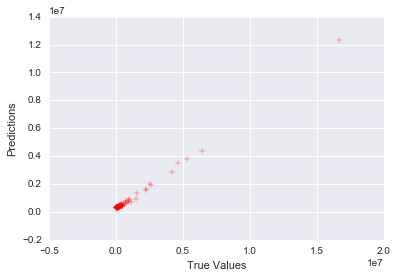

In [95]:
## Modeling ## 
# lm linear / lasso / rr
# x1 = 2015 q1 (total profit by county) DF = Q1_15
# y1 = 2015 q234 total profit by county DF = Q234_15
# fit model to above
# predict y2 (Q234 total profit by county) 
# by x2 (Q1 total profit by county) DF = df2016


X = salesQ1
y = t_salesQ234
X1 = sales2016

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.33)

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lrcv = linear_model.RidgeCV()
lrcv_model = lrcv.fit(X,y)
predictions = lrcv_model.predict(X1)
lrcv_r2 =  r2_score(y_true=y, y_pred=lrcv_model.predict(X1))
print "Pre TTS R^2 Score:", lrcv_r2

## The line / model
plt.scatter(y, predictions, s=30, c='r', marker='+', zorder=10)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print "Post TTS R^2 Score:", lrcv_model.score(X,y)
 
y1 = lrcv_model.predict(X1)

In [56]:
sales2016.head()

sum                                \
          Bottle Volume (ml) Bottles Sold Profit from Sale   
County                                                       
Adair                1131800         8436         35187.43   
Adams                 469350         1727          7293.89   
Allamakee            2202050        13591         59832.68   
Appanoose            1769625        14566         59035.98   
Audubon               441625         3350         12417.68   

                                
          Volume Sold (Liters)  
County                          
Adair                  8262.44  
Adams                  1643.87  
Allamakee             14839.15  
Appanoose             13713.39  
Audubon                3426.62

In [57]:
sales2016['sum', 'Q2-4 Predicted Prof'] = y1

In [63]:
sales2016['sum', 'Q2-4 Predicted Prof'] = sales2016['sum', 'Q2-4 Predicted Prof'].round(2)

In [64]:
sales2016.head()

sum                                \
          Bottle Volume (ml) Bottles Sold Profit from Sale   
County                                                       
Adair                1131800         8436         35187.43   
Adams                 469350         1727          7293.89   
Allamakee            2202050        13591         59832.68   
Appanoose            1769625        14566         59035.98   
Audubon               441625         3350         12417.68   

                                                    
          Volume Sold (Liters) Q2-4 Predicted Prof  
County                                              
Adair                  8262.44           351065.01  
Adams                  1643.87           308100.49  
Allamakee             14839.15           355965.05  
Appanoose             13713.39           384398.37  
Audubon                3426.62           316366.51

In [59]:
# ## Removing known data (sales) from 

# X = d_salesQ1
# y = t_salesQ234
# X1 = d_sales2016

# lrcv2 = linear_model.RidgeCV()
# lrcv2_model = lrcv2.fit(X,y)

# lrcv_r2 =  r2_score(y_true=y, y_pred=lrcv2_model.predict(X1))
# print lrcv_r2

# lrcv2_model.predict(X1)


# #X_train, X_test, Y_train, Y_test = train_test_split() 

In [61]:
# ls = linear_model.Lasso()
# ls_model = ls.fit(X,y)

# ls_r2 =  r2_score(y_true=y, y_pred=ls_model.predict(X1))
# print ls_r2

# ls_model.predict(X1)



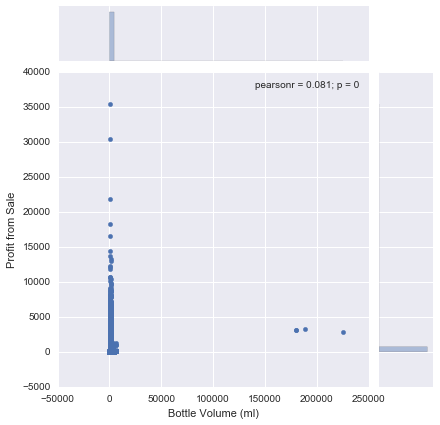

In [73]:
sns.jointplot(x=df['Bottle Volume (ml)'], y=df['Profit from Sale'], kind='scatter')

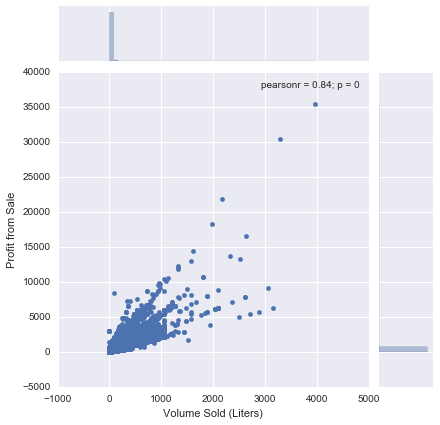

In [68]:
sns.jointplot(x=df['Volume Sold (Liters)'], y=df['Profit from Sale'], kind='scatter')

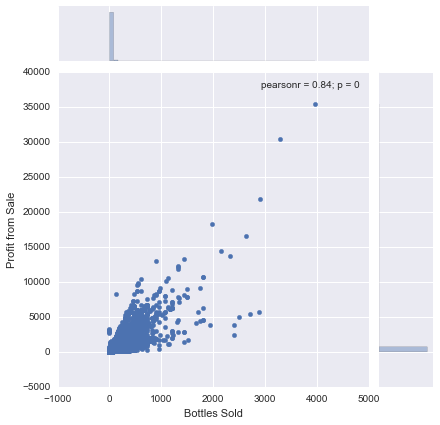

In [69]:
sns.jointplot(x=df['Bottles Sold'], y=df['Profit from Sale'], kind='scatter')